# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [ ]:
import cv2
print(cv2.__version__)

4.11.0


In [ ]:
#!pip install opencv-python==4.4.0.40

In [ ]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.11.0


## Etapa 2 - Conectando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Etapa 3 - Carregando os arquivos do modelo treinado

In [ ]:
path = '/content/gdrive/MyDrive/YOLO/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [ ]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
len(LABELS)

80

In [ ]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [ ]:
net = cv2.dnn.readNet(config_path, weights_path)

In [ ]:
net

< cv2.dnn.Net 0x78b331423fd0>

## Etapa 4 - Definindo mais configurações para a detecção

In [ ]:
# Criando um vetor de cores para os bounding boxes
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[ 50  89 210]
 [252 196  97]
 [ 43 178 231]
 [ 61  79 214]
 [ 54 127  10]
 [174 244  92]
 [200  33  79]
 [243 190 124]
 [ 47 121 133]
 [254  62  18]
 [112  89 146]
 [108 229 157]
 [ 57 142 251]
 [217  60  58]
 [233  14  35]
 [200  42 112]
 [209 164  66]
 [ 56 100 116]
 [  6 182  65]
 [115 151 220]
 [ 94 247 108]
 [217  79 178]
 [132 182 140]
 [189  10 149]
 [ 99  56 205]
 [ 47 174 206]
 [ 96   3  40]
 [230 177  35]
 [165   6  62]
 [214 147  92]
 [ 29 153 204]
 [174  12  27]
 [139 221 165]
 [156 227  37]
 [ 45  45 138]
 [244 131 186]
 [183 137  58]
 [ 30 173 149]
 [ 55 238  85]
 [205  94  15]
 [ 75 144  83]
 [110  64 128]
 [105  32 237]
 [ 84  98  19]
 [212  60 136]
 [ 66 254  33]
 [127  37  91]
 [222 111   6]
 [220  54 170]
 [110  80  15]
 [225  26 120]
 [114 174 232]
 [ 30 201  98]
 [159 243 202]
 [ 83  65 210]
 [218 204 234]
 [ 57 108 116]
 [113 172  69]
 [ 63 247 102]
 [157  52 247]
 [237  44  36]
 [180  60 138]
 [ 93 209  11]
 [187 188  87]
 [ 93 197 142]
 [ 90 154 196]
 [ 68 218 

In [ ]:
# Lista com as camadas convolucionais
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [ ]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[327 353 379]


**`[ ! ] Atenção:`** se estiver executando na versão 3.10 do Python (ou superior) troque `ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]` por:
> `ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]`

No segundo semestre de 2023, o Colab passou a atribuir automaticamente o Python 3.10 às sessões, portanto deixaremos assim

In [ ]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

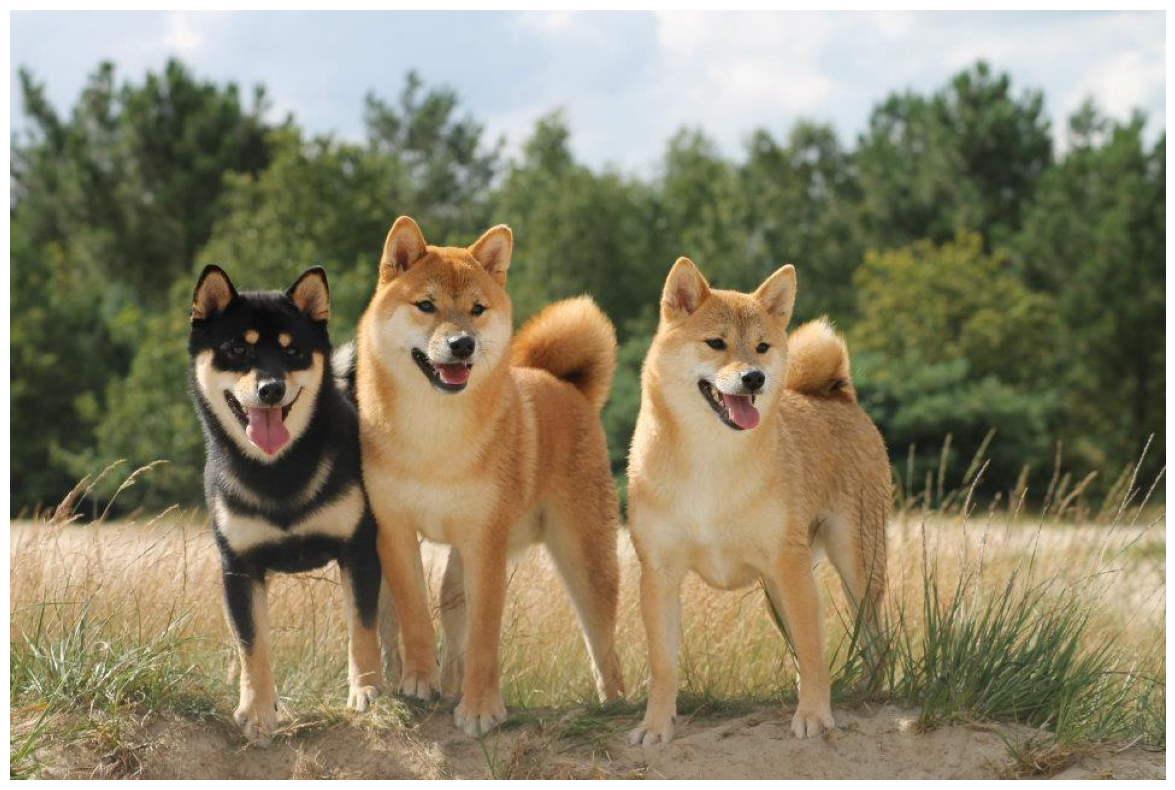

In [ ]:
imagem = cv2.imread('/content/gdrive/MyDrive/YOLO/imagens/cachorros.jpg')
mostrar(imagem)

In [ ]:
type(imagem)

numpy.ndarray

In [ ]:
print(imagem)

[[[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [231 228 223]
  [231 228 223]
  [231 228 223]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [232 229 224]
  [232 229 224]
  [232 229 224]]

 ...

 [[104 138 131]
  [ 80 114 107]
  [ 69 106  98]
  ...
  [111 132 147]
  [105 126 141]
  [ 89 110 125]]

 [[114 148 141]
  [117 151 144]
  [108 145 135]
  ...
  [124 147 163]
  [125 148 164]
  [123 146 162]]

 [[ 49  83  76]
  [ 67 102  92]
  [ 67 104  94]
  ...
  [ 73  96 112]
  [ 68  91 107]
  [ 73  96 112]]]


In [ ]:
imagem_cp = imagem.copy()

In [ ]:
imagem.shape

(640, 960, 3)

In [ ]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


## Etapa 6 - Processando a imagem de entrada

In [ ]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 4.67 segundos


## Etapa 7 - Definindo as variáveis

In [ ]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

## Etapa 8 - Realizando a predição

In [ ]:
len(layer_outputs)

3

In [ ]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.01100546, 0.01021752, 0.02264744, ..., 0.        , 0.        ,
         0.        ],
        [0.01492386, 0.0154329 , 0.03303406, ..., 0.        , 0.        ,
         0.        ],
        [0.01701082, 0.014898  , 0.0511034 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.98426443, 0.03099853, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.9859079 , 0.05975068, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 8112)

In [ ]:
layer_outputs[1]

array([[0.03031925, 0.0320847 , 0.10433292, ..., 0.        , 0.        ,
        0.        ],
       [0.03298572, 0.03253512, 0.13059238, ..., 0.        , 0.        ,
        0.        ],
       [0.03123867, 0.03151363, 0.15157248, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866272, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513649, ..., 0.        , 0.        ,
        0.        ],
       [0.96610314, 0.9677124 , 0.1077224 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
# Os primeiros 5 valores são referentes ao bounding boxes dos objetos, e as previsões começam depois
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.06402364, 0.06951436, 0.158578  , ..., 0.        , 0.        ,
         0.        ],
        [0.0616471 , 0.05672159, 0.31426543, ..., 0.        , 0.        ,
         0.        ],
        [0.03240792, 0.05009169, 0.74589   , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313109 , 0.20663442, ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.2977225 , ..., 0.        , 0.        ,
         0.        ],
        [0.95123345, 0.95295554, 0.5208083 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.4023644e-02, 6.9514364e-02, 1.5857799e-01, 3.4840089e-01,
        4.2169955e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [ ]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
LABELS[16]

'dog'

In [ ]:
np.argmax(np.array([0.10, 0.80, 0.10]))

np.int64(1)

In [ ]:
teste = np.array([0.10, 0.80, 0.10])

In [ ]:
teste[1]

np.float64(0.8)

In [ ]:
# Percorre cada uma das camadas
for output in layer_outputs:
  # Percorre cada uma das previsões
  for detection in output:
    scores = detection[5:]
    # Pega a maior probabilidade
    classeID = np.argmax(scores)
    # Busca o valor da confiança da previsão
    confianca = scores[classeID]
    # Realiza filtro para pegar apenas a previsão com a confiaça maior que o threshold
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))
      # Redimensionandoos bounding boxes
      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      # Desenhar o retangulo ao redor da imagem
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.60595393 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
classe mais provável: 16
confiança: 0.60595393
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.     

In [ ]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [ ]:
print(confiancas), len(confiancas)

[0.6059539318084717, 0.9570457935333252, 0.8891250491142273, 0.9090492725372314, 0.9525662660598755, 0.7894725203514099, 0.9860403537750244, 0.9869317412376404, 0.6623747944831848, 0.6959589719772339, 0.9729039072990417, 0.9767159819602966, 0.8875226974487305, 0.897688627243042, 0.9810122847557068, 0.9824252128601074]


(None, 16)

In [ ]:
print(IDclasses), len(IDclasses)

[np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16), np.int64(16)]


(None, 16)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [ ]:
# Objetos detectados
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [ ]:
objs

array([ 7, 15, 11], dtype=int32)

In [ ]:
print(objs.flatten())

[ 7 15 11]


In [ ]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824252128601074, 0.9767159819602966)

In [ ]:
confiancas[0]

0.6059539318084717

## Etapa 10 - Mostrando o resultado da detecção na imagem

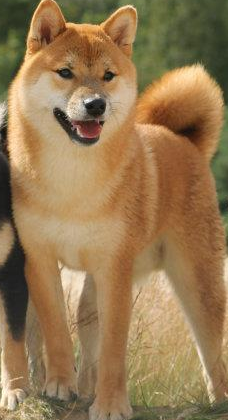

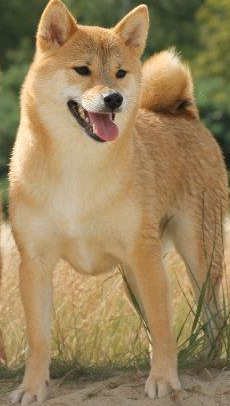

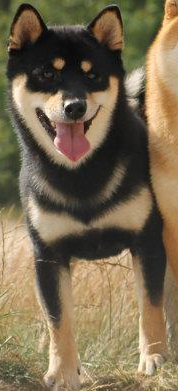

In [ ]:
if len(objs) > 0:
  # O comando faltten transforma matriz em um vetor
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]
    # Criando o bounding box
    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

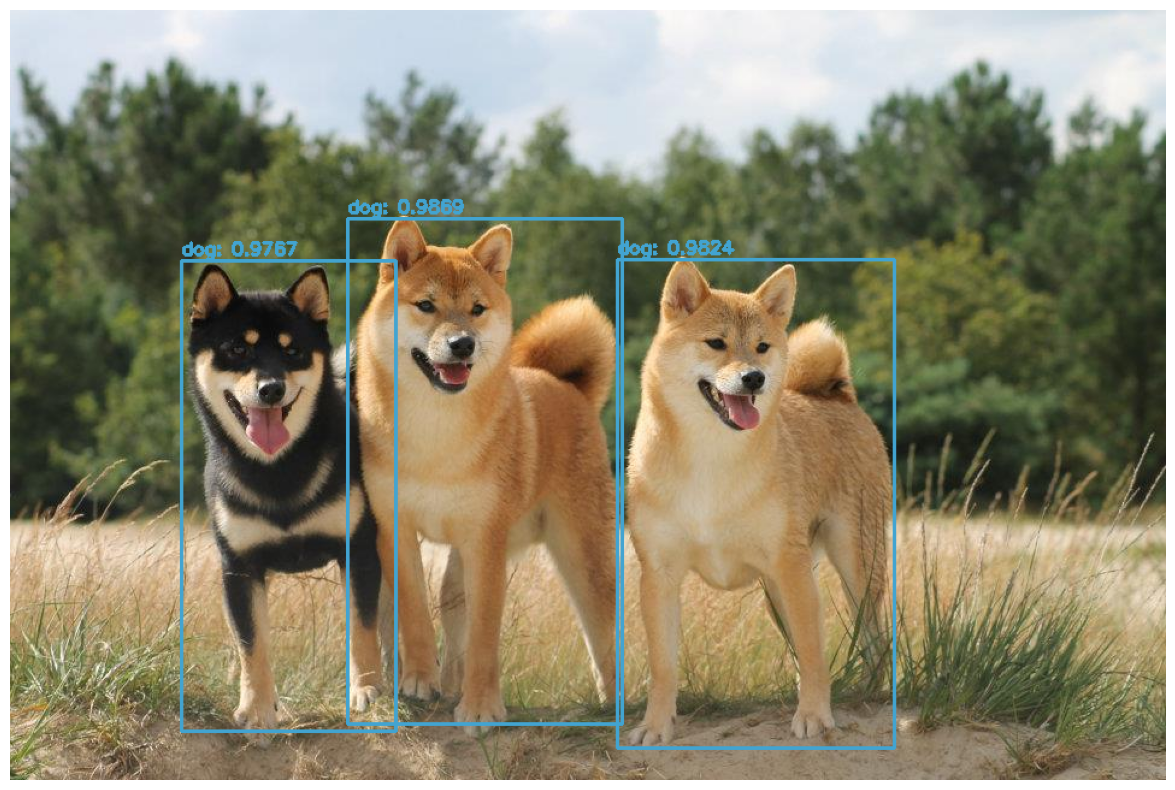

In [ ]:
mostrar(imagem)

In [ ]:
cv2.imwrite('resultado.jpg', imagem)

True